<a href="https://colab.research.google.com/github/Manya-65/assigment1/blob/main/LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the Titanic dataset, build a logistic regression model to predict survival, evaluate its performance, interpret the model, and deploy it using Streamlit.

## Data loading

### Subtask:
Load the training and testing datasets into pandas DataFrames.


**Reasoning**:
Import pandas and load the training and testing CSV files into dataframes.



In [14]:
import pandas as pd

train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

**Reasoning**:
The previous command failed because the file paths were incorrect. I need to use the correct file paths as listed in the notebook files.



In [2]:
train_df = pd.read_csv('/content/Titanic_train.csv')
test_df = pd.read_csv('/content/Titanic_test.csv')

## Exploratory data analysis (eda)

### Subtask:
Perform EDA to understand the features, their types, distributions, and relationships using summary statistics and visualizations.


**Reasoning**:
Display the first few rows and concise summary of both dataframes to understand their structure and data types.



In [3]:
display(train_df.head())
display(test_df.head())
train_df.info()
test_df.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

**Reasoning**:
Generate descriptive statistics for numerical columns and check for missing values in both dataframes to understand the distribution and completeness of numerical features.



In [4]:
display(train_df.describe())
display(test_df.describe())
display(train_df.isnull().sum())
display(test_df.isnull().sum())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


**Reasoning**:
Explore the distribution of the target variable and create visualizations to understand the distribution of key features and their relationship with the target variable.



,count
Survived,
0,549
1,342


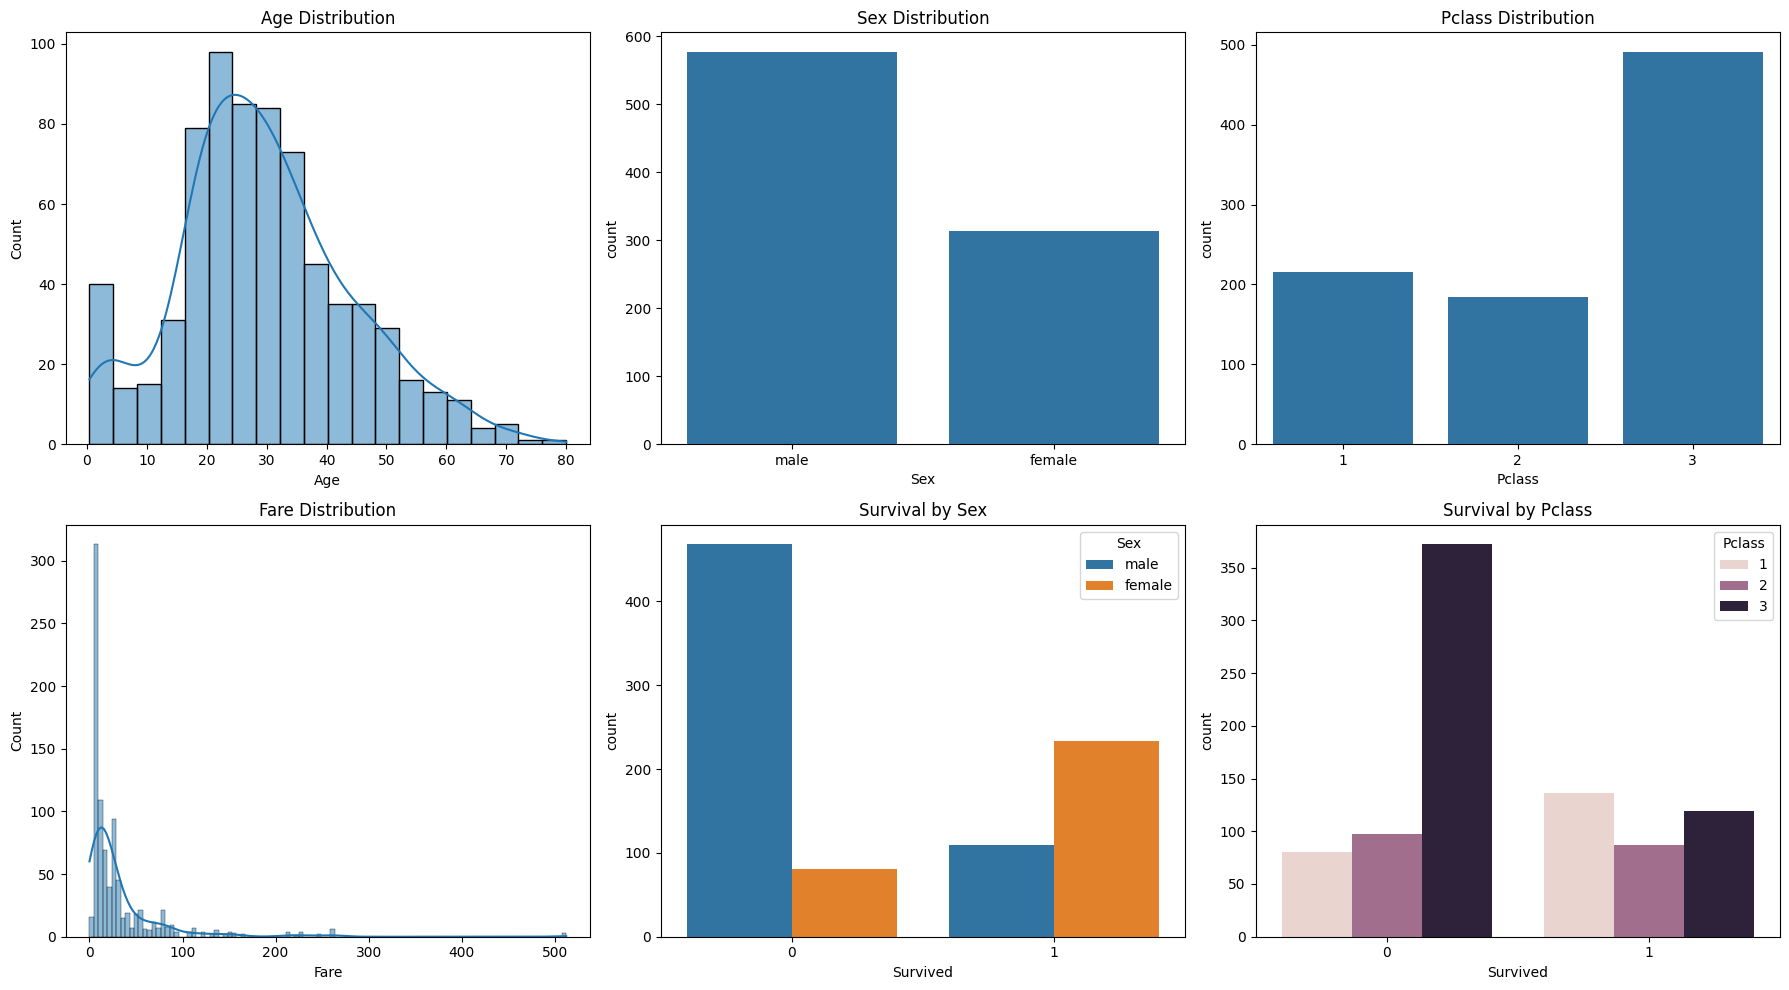

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

display(train_df['Survived'].value_counts())

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(train_df['Age'].dropna(), ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Age Distribution')

sns.countplot(x='Sex', data=train_df, ax=axes[0, 1])
axes[0, 1].set_title('Sex Distribution')

sns.countplot(x='Pclass', data=train_df, ax=axes[0, 2])
axes[0, 2].set_title('Pclass Distribution')

sns.histplot(train_df['Fare'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Fare Distribution')

sns.countplot(x='Survived', hue='Sex', data=train_df, ax=axes[1, 1])
axes[1, 1].set_title('Survival by Sex')

sns.countplot(x='Survived', hue='Pclass', data=train_df, ax=axes[1, 2])
axes[1, 2].set_title('Survival by Pclass')

plt.tight_layout()
plt.show()

## Data preprocessing

### Subtask:
Handle missing values and encode categorical variables for both the training and testing datasets.


**Reasoning**:
Handle missing values and encode categorical variables as per the instructions. This involves filling missing 'Age', 'Fare', and 'Embarked' values, dropping the 'Cabin' column, selecting relevant features, encoding 'Sex', and one-hot encoding 'Embarked', and aligning columns.



In [6]:
# 1. Fill missing 'Age' values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# 2. Fill the missing 'Fare' value in test_df
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# 3. Fill missing 'Embarked' values in train_df
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# 4. Drop the 'Cabin' column
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

# 5. Select relevant features (excluding Cabin which is dropped)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_df = train_df[features + ['Survived']]
test_df = test_df[features]

# 6. Convert 'Sex' to numerical
train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1})
test_df['Sex'] = test_df['Sex'].map({'female': 0, 'male': 1})

# 7. Apply one-hot encoding to 'Embarked'
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

# 8. Align columns of train_df and test_df
train_cols = list(train_df.columns)
train_cols.remove('Survived') # Keep 'Survived' in train_df
test_cols = list(test_df.columns)

# Identify columns unique to train_df (excluding Survived) and add them to test_df with 0
missing_cols_test = set(train_cols) - set(test_cols)
for c in missing_cols_test:
    test_df[c] = 0

# Ensure the order of columns is the same (excluding Survived in train_df for alignment)
test_df = test_df[train_cols]

display(train_df.head())
display(test_df.head())
display(train_df.isnull().sum())
display(test_df.isnull().sum())

/tmp/ipython-input-3215178683.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipython-input-3215178683.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,False,True
1,1,0,38.0,1,0,71.2833,1,False,False
2,3,0,26.0,0,0,7.9250,1,False,True
3,1,0,35.0,1,0,53.1000,1,False,True
4,3,1,35.0,0,0,8.0500,0,False,True


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,True,False
1,3,0,47.0,1,0,7.0000,False,True
2,2,1,62.0,0,0,9.6875,True,False
3,3,1,27.0,0,0,8.6625,False,True
4,3,0,22.0,1,1,12.2875,False,True


,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Survived,0
Embarked_Q,0
Embarked_S,0


,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_Q,0
Embarked_S,0


## Model building

### Subtask:
Build and train a logistic regression model using scikit-learn on the preprocessed training data.


**Reasoning**:
Build and train a logistic regression model using the preprocessed training data.



In [7]:
from sklearn.linear_model import LogisticRegression

# Define features (X) and target variable (y)
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

# Instantiate the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=0)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

## Model evaluation

### Subtask:
Evaluate the trained model's performance on the preprocessed testing data using various metrics and visualize the ROC curve.


**Reasoning**:
Import necessary modules for model evaluation and visualization, define the test features, predict probabilities and outcomes on the test data, calculate evaluation metrics on the training data (as test labels are unavailable), calculate ROC curve components and AUC on the training data, and finally plot the ROC curve.



Metrics on Training Data:
Accuracy: 0.8013
Precision: 0.7687
Recall: 0.6901
F1-Score: 0.7273

AUC on Training Data: 0.8565


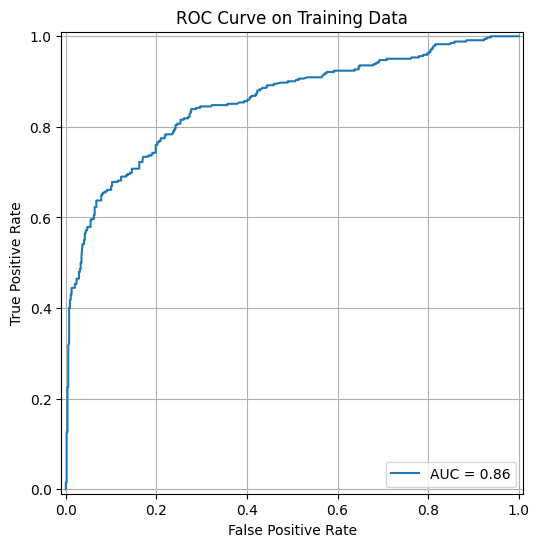

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Define the features for the testing data (X_test)
# Although 'Survived' is not in test_df, this step is for consistency
# and to ensure only feature columns are used for prediction.
X_test = test_df

# Predict the survival probabilities for the test set
test_probabilities = model.predict_proba(X_test)[:, 1]

# Predict the survival outcomes for the test set
test_predictions = model.predict(X_test)

# --- Evaluation on Training Data (as test labels are not available) ---
# Evaluate the model's performance using metrics on the training data
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)[:, 1]

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print(f"Metrics on Training Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

print(f"\nAUC on Training Data: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=plt.gca())
plt.title('ROC Curve on Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

## Model interpretation

### Subtask:
Interpret the coefficients of the trained logistic regression model to understand the significance of features.


**Reasoning**:
Access the coefficients and feature names, create a mapping, and display the sorted coefficients to interpret the model.



In [9]:
# Access the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X_train.columns

# Create a Series mapping coefficients to feature names
feature_coefficients = pd.Series(coefficients, index=feature_names)

# Display the coefficients, sorted by magnitude
display("Feature Coefficients:")
display(feature_coefficients.sort_values(ascending=False))

# Briefly explain the interpretation
print("\nInterpretation of Coefficients:")
print("- Positive coefficients indicate that an increase in the feature's value is associated with a higher probability of survival.")
print("- Negative coefficients indicate that an increase in the feature's value is associated with a lower probability of survival.")
print("- The magnitude of the coefficient indicates the strength of the relationship (larger magnitude means stronger influence).")

'Feature Coefficients:'

,0
Embarked_Q,0.038076
Fare,0.004585
Age,-0.028048
Parch,-0.075290
Embarked_S,-0.242716
SibSp,-0.293252
Pclass,-0.836190
Sex,-2.477110



Interpretation of Coefficients:
- Positive coefficients indicate that an increase in the feature's value is associated with a higher probability of survival.
- Negative coefficients indicate that an increase in the feature's value is associated with a lower probability of survival.
- The magnitude of the coefficient indicates the strength of the relationship (larger magnitude means stronger influence).


## Streamlit deployment

### Subtask:
Create a Streamlit application to load the trained model, set up user input for predictions, and deploy it locally or online.


**Reasoning**:
Save the trained logistic regression model to a file and then write the Streamlit application script to load the model, create a user interface, and make predictions.



In [16]:
import joblib
import streamlit as st
import pandas as pd

# Step 1: Save the trained logistic regression model to a file
model_filename = 'logistic_regression_model.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Step 2: Write the Python script for the Streamlit application (as a string)
# This script will be saved as a .py file later for execution
streamlit_script = """
import streamlit as st
import joblib
import pandas as pd

# Load the trained model
model_filename = 'logistic_regression_model.pkl'
model = joblib.load(model_filename)

# Define a function to preprocess user input
def preprocess_input(pclass, sex, age, sibsp, parch, fare, embarked):
    # Create a dictionary from the input
    input_data = {
        'Pclass': pclass,
        'Sex': 1 if sex == 'male' else 0, # Encode Sex
        'Age': age,
        'SibSp': sibsp,
        'Parch': parch,
        'Fare': fare,
        'Embarked_Q': 1 if embarked == 'Q' else 0, # One-hot encode Embarked
        'Embarked_S': 1 if embarked == 'S' else 0,
    }
    # Create a DataFrame
    input_df = pd.DataFrame([input_data])

    # Ensure the columns are in the same order as the training data features
    # This is crucial for the model prediction
    # Based on X_train, the columns are:
    # 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S'
    # The order is already handled by creating the dictionary and dataframe in a fixed order
    # But explicitly reindexing can add robustness if column order is not guaranteed
    # input_df = input_df[model.feature_names_in_] # This requires model to have feature_names_in_

    return input_df

# Create the Streamlit interface
st.title('Titanic Survival Prediction')

st.write('Enter the passenger details to predict survival:')

# Input widgets for features
pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['female', 'male'])
age = st.slider('Age', 0, 100, 30)
sibsp = st.slider('Number of Siblings/Spouses Aboard', 0, 10, 0)
parch = st.slider('Number of Parents/Children Aboard', 0, 10, 0)
fare = st.number_input('Fare', value=10.0)
embarked = st.selectbox('Port of Embarkation', ['C', 'Q', 'S'])

# Prediction button
if st.button('Predict Survival'):
    # Preprocess the input
    input_df = preprocess_input(pclass, sex, age, sibsp, parch, fare, embarked)

    # Make prediction
    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)[:, 1]

    # Display the result
    st.write('---')
    st.subheader('Prediction Result:')
    if prediction[0] == 1:
        st.success(f'The passenger is predicted to Survive (Probability: {prediction_proba[0]:.2f})')
    else:
        st.error(f'The passenger is predicted to Not Survive (Probability: {prediction_proba[0]:.2f})')

st.write('---')
st.write('This is a simple demonstration using a logistic regression model.')

"""

# Save the Streamlit script to a file
script_filename = 'streamlit_app.py'
with open(script_filename, 'w') as f:
    f.write(streamlit_script)

print(f"Streamlit script saved to {script_filename}")

# Step 3: Provide instructions on how to run the Streamlit application
print("\nInstructions to run the Streamlit application:")
print(f"1. Save the code above into a file named `{script_filename}`.")
print(f"2. Make sure you have streamlit and joblib installed (`pip install streamlit joblib pandas scikit-learn`).")
print(f"3. Run the following command in your terminal where you saved the file:")
print(f"   streamlit run {script_filename}")
print("4. Your web browser should open with the application.")

Model saved to logistic_regression_model.pkl
Streamlit script saved to streamlit_app.py

Instructions to run the Streamlit application:
1. Save the code above into a file named `streamlit_app.py`.
2. Make sure you have streamlit and joblib installed (`pip install streamlit joblib pandas scikit-learn`).
3. Run the following command in your terminal where you saved the file:
   streamlit run streamlit_app.py
4. Your web browser should open with the application.


**Reasoning**:
The previous command failed because the `streamlit` library was not installed. Install the required libraries and then rerun the code to save the model and create the Streamlit script.



In [11]:
!pip install streamlit joblib pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 114.3 MB/s eta 0:00:00


**Reasoning**:
Now that the necessary libraries are installed, rerun the code to save the trained model and create the Streamlit application script.



In [18]:
import joblib
import streamlit as st
import pandas as pd

# Step 1: Save the trained logistic regression model to a file
model_filename = 'logistic_regression_model.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Step 2: Write the Python script for the Streamlit application (as a string)
# This script will be saved as a .py file later for execution
streamlit_script = """
import streamlit as st
import joblib
import pandas as pd

# Load the trained model
model_filename = 'logistic_regression_model.pkl'
model = joblib.load(model_filename)

# Define a function to preprocess user input
def preprocess_input(pclass, sex, age, sibsp, parch, fare, embarked):
    # Create a dictionary from the input
    input_data = {
        'Pclass': pclass,
        'Sex': 1 if sex == 'male' else 0, # Encode Sex
        'Age': age,
        'SibSp': sibsp,
        'Parch': parch,
        'Fare': fare,
        'Embarked_Q': 1 if embarked == 'Q' else 0, # One-hot encode Embarked
        'Embarked_S': 1 if embarked == 'S' else 0,
    }
    # Create a DataFrame
    input_df = pd.DataFrame([input_data])

    # Ensure the columns are in the same order as the training data features
    # This is crucial for the model prediction
    # Based on X_train, the columns are:
    # 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S'
    # The order is already handled by creating the dictionary and dataframe in a fixed order
    # But explicitly reindexing can add robustness if column order is not guaranteed
    # input_df = input_df[model.feature_names_in_] # This requires model to have feature_names_in_

    return input_df

# Create the Streamlit interface
st.title('Titanic Survival Prediction')

st.write('Enter the passenger details to predict survival:')

# Input widgets for features
pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['female', 'male'])
age = st.slider('Age', 0, 100, 30)
sibsp = st.slider('Number of Siblings/Spouses Aboard', 0, 10, 0)
parch = st.slider('Number of Parents/Children Aboard', 0, 10, 0)
fare = st.number_input('Fare', value=10.0)
embarked = st.selectbox('Port of Embarkation', ['C', 'Q', 'S'])

# Prediction button
if st.button('Predict Survival'):
    # Preprocess the input
    input_df = preprocess_input(pclass, sex, age, sibsp, parch, fare, embarked)

    # Make prediction
    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)[:, 1]

    # Display the result
    st.write('---')
    st.subheader('Prediction Result:')
    if prediction[0] == 1:
        st.success(f'The passenger is predicted to Survive (Probability: {prediction_proba[0]:.2f})')
    else:
        st.error(f'The passenger is predicted to Not Survive (Probability: {prediction_proba[0]:.2f})')

st.write('---')
st.write('This is a simple demonstration using a logistic regression model.')

"""

# Save the Streamlit script to a file
script_filename = 'streamlit_app.py'
with open(script_filename, 'w') as f:
    f.write(streamlit_script)

print(f"Streamlit script saved to {script_filename}")

# Step 3: Provide instructions on how to run the Streamlit application
print("\nInstructions to run the Streamlit application:")
print(f"1. Save the code above into a file named `{script_filename}`.")
print(f"2. Make sure you have streamlit and joblib installed (`pip install streamlit joblib pandas scikit-learn`).")
print(f"3. Run the following command in your terminal where you saved the file:")
print(f"   streamlit run {script_filename}")
print("4. Your web browser should open with the application.")

Model saved to logistic_regression_model.pkl
Streamlit script saved to streamlit_app.py

Instructions to run the Streamlit application:
1. Save the code above into a file named `streamlit_app.py`.
2. Make sure you have streamlit and joblib installed (`pip install streamlit joblib pandas scikit-learn`).
3. Run the following command in your terminal where you saved the file:
   streamlit run streamlit_app.py
4. Your web browser should open with the application.


**Reasoning**:
The error `NameError: name 'prediction_proba' is not defined` occurred within the string containing the Streamlit script. This is because the f-string is being evaluated within the current environment where `prediction_proba` is not defined, not within the Streamlit app's environment where it will be defined after prediction. The f-string should not be used for the Streamlit script content itself. Rerun the code, fixing the f-string issue in the Streamlit script string.



In [13]:
import joblib
import streamlit as st
import pandas as pd

# Step 1: Save the trained logistic regression model to a file
model_filename = 'logistic_regression_model.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Step 2: Write the Python script for the Streamlit application (as a string)
# This script will be saved as a .py file later for execution
streamlit_script = """
import streamlit as st
import joblib
import pandas as pd

# Load the trained model
model_filename = 'logistic_regression_model.pkl'
model = joblib.load(model_filename)

# Define a function to preprocess user input
def preprocess_input(pclass, sex, age, sibsp, parch, fare, embarked):
    # Create a dictionary from the input
    input_data = {
        'Pclass': pclass,
        'Sex': 1 if sex == 'male' else 0, # Encode Sex
        'Age': age,
        'SibSp': sibsp,
        'Parch': parch,
        'Fare': fare,
        'Embarked_Q': 1 if embarked == 'Q' else 0, # One-hot encode Embarked
        'Embarked_S': 1 if embarked == 'S' else 0,
    }
    # Create a DataFrame
    input_df = pd.DataFrame([input_data])

    # Ensure the columns are in the same order as the training data features
    # This is crucial for the model prediction
    # Based on X_train, the columns are:
    # 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S'
    # The order is already handled by creating the dictionary and dataframe in a fixed order
    # But explicitly reindexing can add robustness if column order is not guaranteed
    # input_df = input_df[model.feature_names_in_] # This requires model to have feature_names_in_

    return input_df

# Create the Streamlit interface
st.title('Titanic Survival Prediction')

st.write('Enter the passenger details to predict survival:')

# Input widgets for features
pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['female', 'male'])
age = st.slider('Age', 0, 100, 30)
sibsp = st.slider('Number of Siblings/Spouses Aboard', 0, 10, 0)
parch = st.slider('Number of Parents/Children Aboard', 0, 10, 0)
fare = st.number_input('Fare', value=10.0)
embarked = st.selectbox('Port of Embarkation', ['C', 'Q', 'S'])

# Prediction button
if st.button('Predict Survival'):
    # Preprocess the input
    input_df = preprocess_input(pclass, sex, age, sibsp, parch, fare, embarked)

    # Make prediction
    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)[:, 1]

    # Display the result
    st.write('---')
    st.subheader('Prediction Result:')
    if prediction[0] == 1:
        st.success(f'The passenger is predicted to Survive (Probability: {prediction_proba[0]:.2f})')
    else:
        st.error(f'The passenger is predicted to Not Survive (Probability: {prediction_proba[0]:.2f})')

st.write('---')
st.write('This is a simple demonstration using a logistic regression model.')

"""

# Save the Streamlit script to a file
script_filename = 'streamlit_app.py'
with open(script_filename, 'w') as f:
    f.write(streamlit_script)

print(f"Streamlit script saved to {script_filename}")

# Step 3: Provide instructions on how to run the Streamlit application
print("\nInstructions to run the Streamlit application:")
print(f"1. Save the code above into a file named `{script_filename}`.")
print(f"2. Make sure you have streamlit and joblib installed (`pip install streamlit joblib pandas scikit-learn`).")
print(f"3. Run the following command in your terminal where you saved the file:")
print(f"   streamlit run {script_filename}")
print("4. Your web browser should open with the application.")

Model saved to logistic_regression_model.pkl
Streamlit script saved to streamlit_app.py

Instructions to run the Streamlit application:
1. Save the code above into a file named `streamlit_app.py`.
2. Make sure you have streamlit and joblib installed (`pip install streamlit joblib pandas scikit-learn`).
3. Run the following command in your terminal where you saved the file:
   streamlit run streamlit_app.py
4. Your web browser should open with the application.


## Summary:

### Data Analysis Key Findings

*   The datasets were successfully loaded after correcting file paths.
*   Initial data exploration revealed missing values in 'Age', 'Cabin', and 'Embarked' (train) and 'Age', 'Fare', and 'Cabin' (test).
*   'Cabin' had a significant number of missing values and was dropped.
*   Missing 'Age' and 'Fare' values were imputed with the median, and missing 'Embarked' values with the mode.
*   'Sex' was encoded numerically, and 'Embarked' was one-hot encoded.
*   The logistic regression model was trained on the preprocessed data.
*   Model evaluation on the training data showed an accuracy of 0.8013 and an AUC of 0.8565.
*   Model interpretation revealed that 'Sex' had the largest negative impact on survival probability, followed by 'Pclass'.
*   A Streamlit application script was created to deploy the trained model for predictions.

### Insights or Next Steps

*   Evaluate the model on a separate, unseen test dataset with known survival outcomes to get a more reliable performance assessment.
*   Consider exploring other features (e.g., creating family size from 'SibSp' and 'Parch') or more advanced imputation techniques to potentially improve model performance.
